# **Instructions**

This document is a template, and you are not required to follow it exactly. However, the kinds of questions we ask here are the kinds of questions we want you to focus on. While you might have answered similar questions to these in your project presentations, we want you to go into a lot more detail in this write-up; you can refer to the Lab homeworks for ideas on how to present your data or results. 

You don't have to answer every question in this template, but you should answer roughly this many questions. Your answers to such questions should be paragraph-length, not just a bullet point. You likely still have questions of your own -- that's okay! We want you to convey what you've learned, how you've learned it, and demonstrate that the content from the course has influenced how you've thought about this project.

# Multiclass Classification Task with Facial Recognition Application
Project mentor: Darius Irani

Ashley Tsang <atsang5@jhu.edu>, Frederick Xu <fxu10@jhu.edu>, Jessica Su <jsu30@jhu.edu> Yusra Rahman <yrahman1@jhu.edu>

Link_to_git_repo: <https://github.com/jsu30/ml_fall2020_finalproj>

# Outline and Deliverables

List the deliverables from your project proposal. For each uncompleted deliverable, please include a sentence or two on why you weren't able to complete it (e.g. "decided to use an existing implementation instead" or "ran out of time"). For each completed deliverable, indicate which section of this notebook covers what you did.

If you spent substantial time on any aspects that weren't deliverables in your proposal, please list those under "Additional Work" and indicate where in the notebook you discuss them.

### Uncompleted Deliverables
1. **Would like to accomplish #1: Compare our HMAX CNN performance to our hierarchical clustering baseline and our HD-CNN baseline.** We weren’t able to implement HMAX due to time and knowledge constraints. But, we were able to compare our BestNN, InceptionNet baseline, and clustering baseline results together, [in “Results” below](#scrollTo=_Zdp4_H-kx8H).
2. **Would like to accomplish #2: Implement an HMAX.** We read the papers for HMAX implementation, but decided we didn’t currently have enough knowledge and time to successfully implement it. 
3. **Would like to accomplish #3: Interpretability of the HMAX neural network.** We unfortunately didn’t have enough time to dive into the interpretability of our models.


### Completed Deliverables
1. **Must complete #1: Pre-process the images.** We discuss our dataset preprocessing [in “Dataset” below.](#scrollTo=zFq-_D0khnhh)
2. **Must complete #2: Implement Hierarchical Agglomerative Clustering Baseline.** We discuss our clustering baseline [in “Baselines” below. ](#scrollTo=oMyqHUa0jUw7)
3. **Must complete #3: Produce homogeneity, completeness, and purity scores for the clustering model.** We present our clustering baseline results, [in “Results” below](#scrollTo=_Zdp4_H-kx8H).
4. **Expect to complete #1:  Implement a CNN with a hierarchical training approach (HD-CNN).** Although due to time constraints we were unable to implement a HD-CNN approach, we were able to implement a modified BestNN model, presented [in “Results” below](#scrollTo=_Zdp4_H-kx8H).
5. **Expect to complete #2: Fine tune the model by adding Regularization such as dropout layers, and feature selection such as PCA, or LDA.** Because we saw overfitting in our BestNN model, we modified it to include dropout layers, presented [in “Results” below](#scrollTo=_Zdp4_H-kx8H)
6. **Expect to complete #3: Have better accuracy than 10% (pure guessing in a 10-class prediction) in our HD-CNN.** All baselines and BestNN models achieved higher than guessing accuracy, as presented [in “Results” below](#scrollTo=_Zdp4_H-kx8H)


# Preliminaries

## What problem were you trying to solve or understand?

Our project goal is to understand facial recognition tasks for improving home security. Often home security systems detect movement before sending pictures via email and some detect human movement by recognizing faces. Our focus is to classify an image as one of the following categories, a human face, animal face, or non-face. This is similar to other problems that we've seen in homeworks, specifically using neural networks for image classification, which we did in a previous homework. This problem is unique because we had to break down the problem into many classes, so instead of just broadly classifying human vs non-human face, we are aiming to classify between human faces, different animal faces and different non-faces (e.g. foods). This problem has many ethical implications because the overall goal of this algorithm is to be able to use it for home or national security. In the instance of home security, ideally, if the algorithm detects a human face, a picture or video clip will be sent to the home owner and/or police, which means that we need to be extra careful in implicit biases in our dataset that we train the neural network on.

## Dataset(s)

The dataset we used was a combination of 3 publicly available datasets. For the faces, we used the [Flickr dataset](https://www.kaggle.com/arnaud58/flickrfaceshq-dataset-ffhq/version/1?select=00021.png). For the animals (labels: cat, dog, wild), we used an [Animal Faces](https://www.kaggle.com/andrewmvd/animal-faces) dataset. For food (labels: sushi, taco, takoyaki, tiramisu, tuna_tartare, waffles), we used a [food image](https://www.kaggle.com/kmader/food41) dataset. Our dataset consisted of 10 labels: faces, cats, dogs, wild, sushi, taco, takoyaki, tiramisu, tuna_tartare, and waffles. From the kaggle datasets, we sampled 1000 images per label, for a total of 10,000 images. 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

Mounted at /content/drive


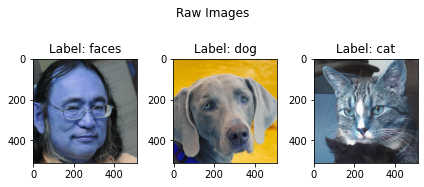

In [ ]:
# Load your data and print 2-3 examples
raw_path = '/content/drive/MyDrive/ML Final Project/ML Final Project Data/Raw/train/'
labels = ['faces', 'dog', 'cat']
fig, axs = plt.subplots(1, 3)
fig.suptitle('Raw Images')
for i in range(3):
  path = raw_path + labels[i] + '/'
  imgs = os.listdir(path)
  img = cv2.imread(path + imgs[0])
  axs[i].imshow(img)
  axs[i].set_title('Label: ' + labels[i])

fig.tight_layout()
fig.subplots_adjust(top=1.2)

## Pre-processing

The dataset we created is class-balanced, since each label has 1000 raw images. Even though we initially wanted to focus on facial recognition, which would mean that the class is unbalanced since we only have 1000 faces compared to the 9000 non-faces, given our current approach of doing multi-class recognition, we do have a balanced dataset. To pre-process these images, we resized the images to 128 by 128 pixels, grayscaled and normalized the images. The resizing was a crucial step because we encountered RAM problems in Google Colab when we tried 512 by 512 pixels. We grayscaled the images because our main approach is to use neural networks, which means that a grayscale image would be easier to train, and require less training data than colored images (which has more information-RGB channels), which would require more training data because there are more parameters to train. We also normalized the images because in training the neural network, we want the features to be in the same range so that the gradients are stable.

Furthermore, to make our model more robust, we created augmentations of a subset of the images. For each label, we augmented 125 images by rotating the image by 10 degrees about the center. 

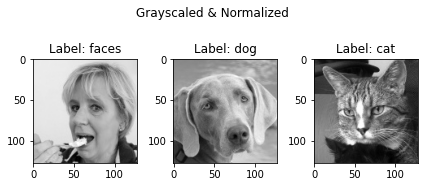

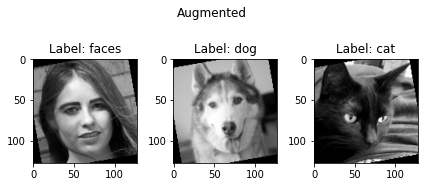

In [ ]:
# For those same examples above, what do they look like after being pre-processed?
proc_path = '/content/drive/MyDrive/ML Final Project/ML Final Project Data/Processed/Train/'
labels = ['faces', 'dog', 'cat']
fig, axs = plt.subplots(1, 3)

fig.suptitle('Grayscaled & Normalized')
for i in range(3):
  path = proc_path + labels[i] + '/'
  imgs = os.listdir(path)
  img = cv2.imread(path + imgs[0])
  axs[i].imshow(img)
  axs[i].set_title('Label: ' + labels[i])

fig.tight_layout()
fig.subplots_adjust(top=1.2)

fig, axs = plt.subplots(1, 3)

fig.suptitle('Augmented')
for i in range(3):
  path = proc_path + labels[i] + '/'
  imgs = os.listdir(path)
  img = cv2.imread(path + imgs[-10])
  axs[i].imshow(img)
  axs[i].set_title('Label: ' + labels[i])

fig.tight_layout()
fig.subplots_adjust(top=1.2)

# Models and Evaluation

## Experimental Setup

For our experimental setup, we will be comparing between the baseline and the experimental method using primarily an accuracy metric. Since our data split is relatively uniform, the accuracy metric can be used here as an indicator of model performance. For clustering, the closest analog to accuracy would be the purity metric, which is explained in further detail in the baseline discussion. To observe whether or not our method is overfitting, we will compare the loss observed between the training and validation set as well as the accuracy.

## Baselines 

What baselines did you compare against? Why are these reasonable?

### i) Hierarchical Clustering

The first baseline we looked into was a Hierarchical Clustering method proposed by Fachrurozzi et. al. 2017. This model was founded on the concepts of Content-Based Image Retrieval (CBIR), which makes use of computer vision techniques to create features using Local Binary Pattern (LBP). LBP investigates a grayscaled pixel and its immediate neighbors within a specified radius, and for each of the pixels, a "1" is encoded if the central pixel has a greater intensity, and a "0" is encoded if the central pixel is of lower intensity. This forms an 8-digit binary number for the central pixel, which is used as a feature. After these features are created, the LBPs are fed into Agglomerative Clustering for unsupervised learning. Using this method, it is possible to learn different levels of categories in order to solve multi-class problems, with coarser categories pertaining to higher-level representations of classes (for example, a large cluster of "animals" could be learned for "cat, dog, wild animal"). 

Evaluation of clustering performance makes use of several metrics that involve ground truth labels. Firstly, homogeneity and completeness of the clustering can be observed. Homogeneity investigates how uniform a cluster is: does each cluster have members of only a single category? Completeness investigates whether members of a single category are all part of the same cluster, for example all images labeled as "dog" should be grouped together. For an analog to accuracy, the purity metric can be used to compare the performance of the clustering algorithm with that of other algorithms. Using the ground truth labels, the most frequent modal category is calculated for each cluster based on the identity of its members, and all members are subsequently assigned that modal label. The number of correctly classified members is then divided by the total number of inputs, resulting in a purity score that describes a percent accuracy based on modal classification.

Note that all code for running the hierarchical clustering model, as well as the functions to evaluate model performance and create model visualizations, are included in a seperate notebook `clustering_alg.ipynb`.

### ii) InceptionNetV3

The second baseline we looked into was an InceptionNetV3, a convolutional neural network architecture proposed by Szegedy et. al 2015. We decided to implement InceptionNet since it is a state of the art architecture used in object detection. The model achieved high accuracy in the ImageNet dataset and had facial recognition applications, which is why we decided to implement this. Addtionally, we initially sought to train our own baseline model and InceptionNet's compuational cost is lower than other object detection architectures. However, still with RAM limitations we experienced, we decided to use tranfer learning and perform feature extraction with a pretrained InceptionNet model. This is a reasonable baseline since our BestNN implementation is a CNN implementation, so comparing two CNN models is suitable.

We did look into other object detection baselines, such as VGG and ResNet, which were compared against on the large ImageNet dataset. Since we put together our own dataset from various sources, there was no existing baselines for what we were working with, but we could compare it to general object classification datasets.



## Methods

For the experimental method, we intended to implement a Hierarchical Convolutional Neural Network based on an HMAX structure proposed by Serre et. al. 2007. This model was bio-inspired, mimicking the various layers of the ventral visual pathway. The HMAX structure is further elaborated and generalized by Yan et. al. 2015 as a Hierarchical CNN (HD-CNN). The HD-CNN makes use of categories learned from a hierarchical clustering step, which we performed as a baseline. 

The first step in this process (which is the only step we were able to get to) was to select an initial neural network to use for training. For this, we used a BestNN derived from a homework assignment.

### BestNN

We implemented a convolutional neural network similar to what we had worked on in homework 5. The model originally used three convolutional layers, each with relu activations and maxpooling, followed by three linear layers, two with relu activations and 50% dropout and the last with softmax activation. With a smaller data set of around 900 images, this model preformed well with an accuracy of about 91% on the test set. After moving to our original and larger set of images (800 train, 225 validation, and 100 in test), the model with the original structure preformed poorly. The model was then restructured to have 4 convolutional layers. Each used a relu activation, 2D max pooling, and 2D Batch Norm. The third layer was followed by a 40% dropout, and after flattening, was followed again by a 40% dropout. Afterwards, three linear layers, two with relu activations and 40% dropout and last with softmax activations, follow. This model accuracies maxing to about 56% on validation and 57% on the test set. This model did perform worse than the original model on the previous data set, but it still achieves higher accuracies compared to the clutering baseline. 

There could be several reasons for the performance disparity between runs, however we were unable to conclusively pinpoint a particular reason for the dip. We were able to maintain relatively similar data splits, but it could be possible that the original run had a non-uniform data split. The change in network structure could also have a drastic effect on the neural network performance, leading us to believe that perhaps a deeper neural network was not suitable for the task

From the plotting of the loss functions, we can see that the neural network had issues generalizing, overfitting to the training data and subsequently achieving worse validation accuracy. Despite the addition of dropout layers and data augmentation, the model still underwent overfitting.

(The accuracies are compared under the Results portion of this submission. The git repository includes the model for the BestNN.)

## Results

## Hierarchical Clustering Baseline Results

Firstly, we observed a potentially necessary methodology change. Unfortunately, the clustering was unable to converge when using a Manhattan or Cityblock distance as proposed by Fachrurrozi et. al. As such, we switched to using Euclidean distance. After testing complete linkage, we realized that it was impossible to select a distance hyperparameter, as the differences in distance governing a cluster combination were incredibly small, thus resulting in small changes in the distance threshold creating large differences in the cluster count. We switched to Ward Linkage which allowed for an easier selection of a distance threshold for a reasonable number of clusters. Using Ward Linkage, we selected a distance threshold of 5000, 6000, and 7000 to create 25, 12, and 11 clusters respectively.



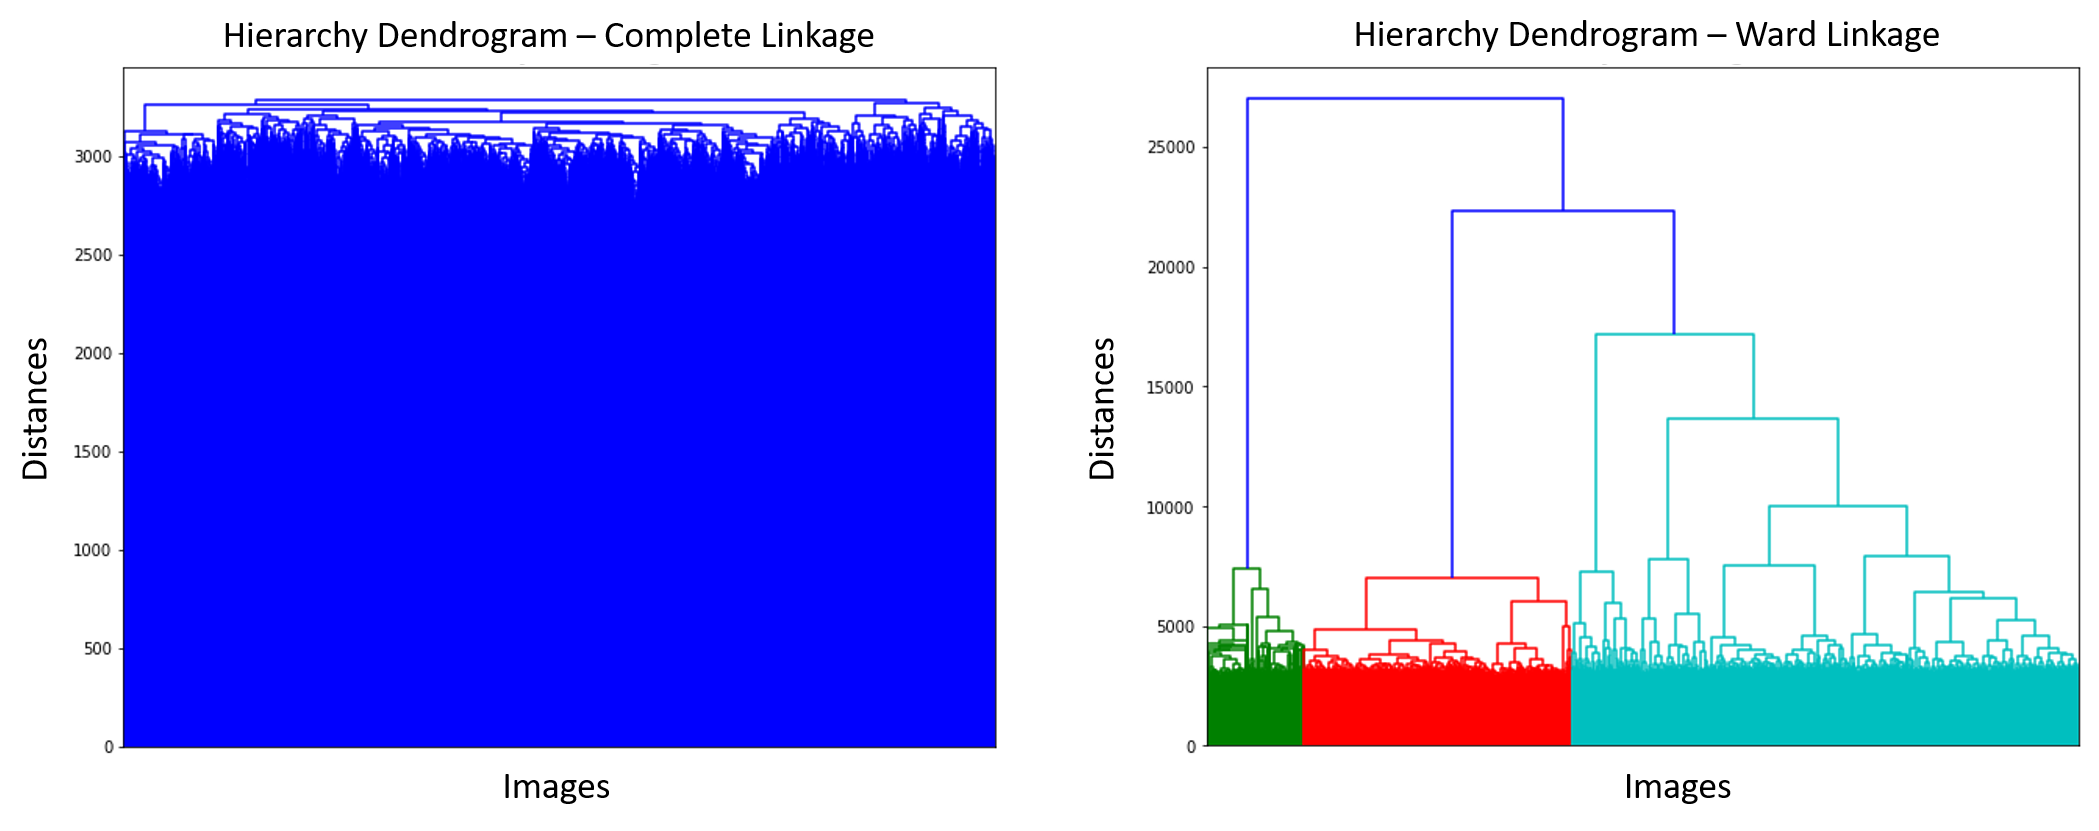

Overall, the hierarchical clustering baseline performed very poorly. We can see from the clustering metrics (Table 1.) that homogeneity and completeness are both very low. As we decreased the number of clusters by increasing the distance threshold, the completness increased slightly while the homogeneity began decreasing. Additionally, the purity metric began decreasing as well. We were only able to obtain a purity of 25.6%, which is very low accuracy. This means that a hierarchical clustering method based on CBIR may not be the best for an image classification task.



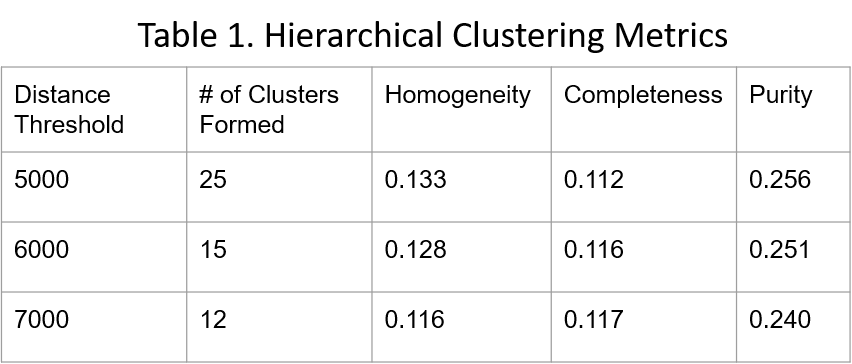

We also took a closer look at how each category was predicted. This was done by first assigning the modal class to each cluster, as we did when computing purity. For each cluster, we tallied up the members of the cluster that were properly classified under the cluster's modal class label. We can see that we were able to perform very well on faces, but poorly on other objects and animals. This indicates significant model bias towards faces. The effect is also more readily visible in pie-charts of each cluster. The following displayed figures pertain to the model with a distance threshold of 5000, which had the best purity metric of the thresholds tested.

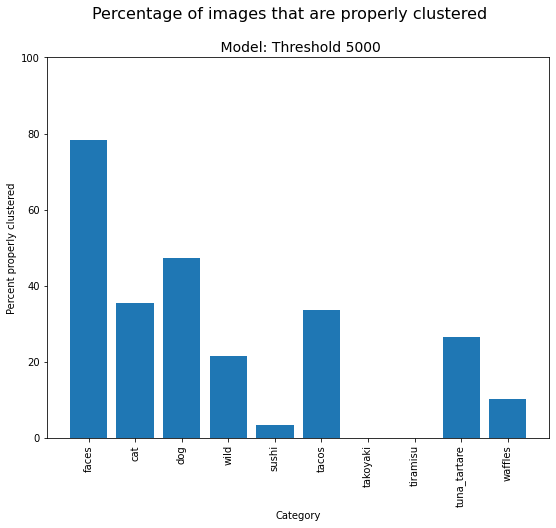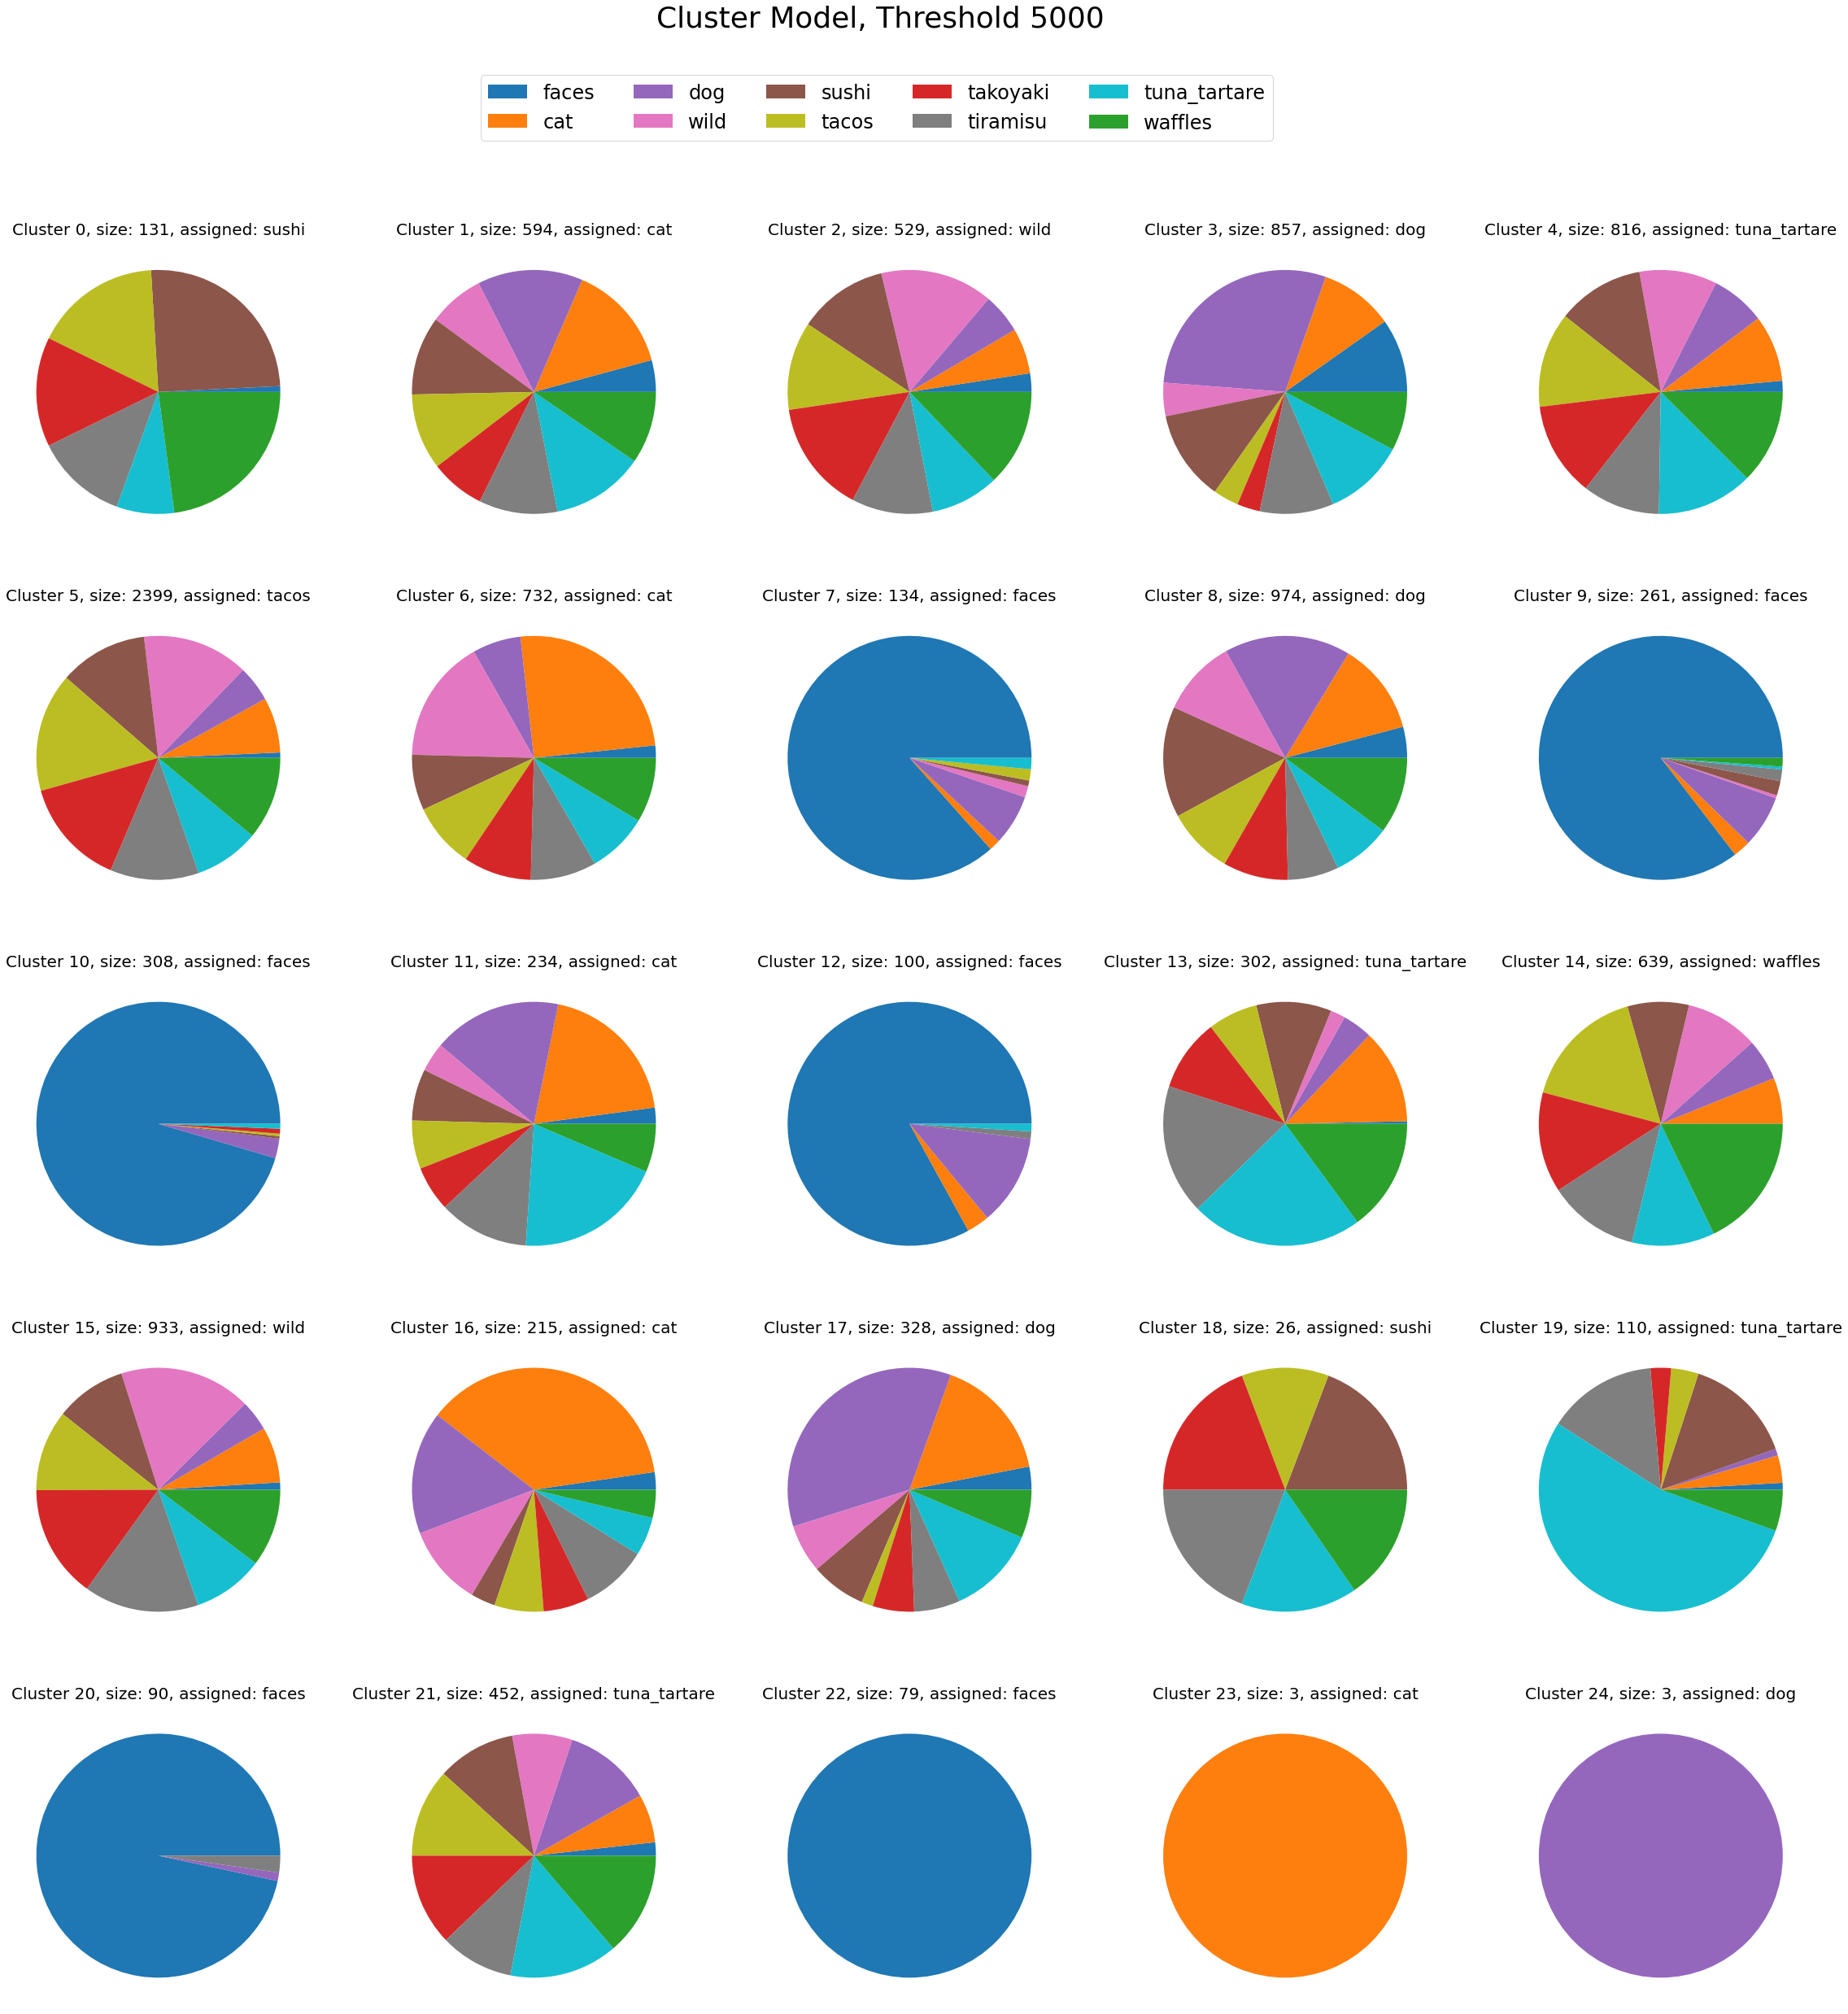

## InceptionNetV3 Baseline Results

We trained InceptionNet for 1 epoch. We were only able to train for 1 epoch due to significant training times required. We achieved the following results during training:

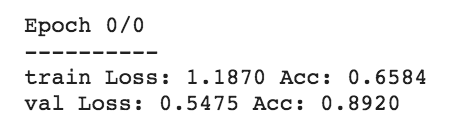

InceptionNet test Accuracy using held out test set: **0.834**

Class Breakdown Test Accuracy results:

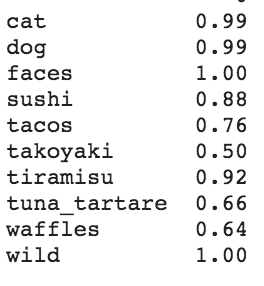

Visualization of Confusion Matrix for actual vs. predicted classes of test set:

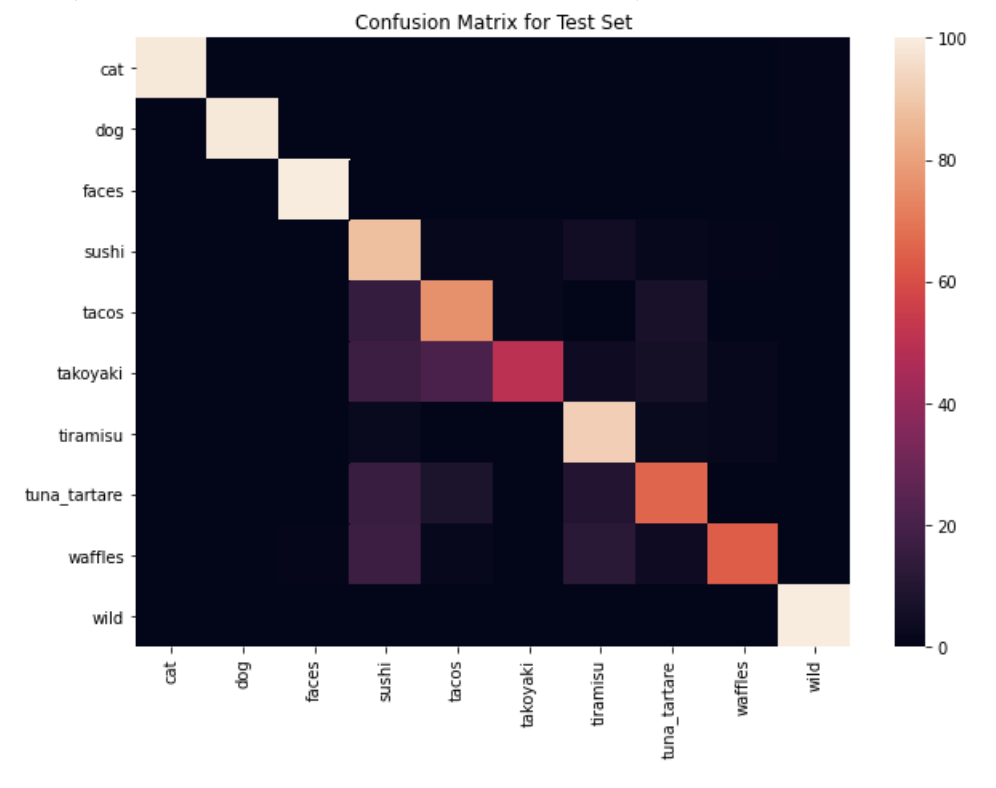

This breakdown visualizes which classes were most accurately categorized by the InceptionNet model. The animal (cat, dog, wild) classes did very well, as well as the faces dataset, achieving perfect accuracy in the categorization. The food categories, on the other hand, did not perform as well, and from the visualization we cna see that there was a lot more confusion with categorizing these images. For example, the takoyaki class posed the greatest difficulty - it often got confused with the sushi and taco classes. 

## BestNN Experimental Results

Taking learned concepts from class and homework 5, we implemented a convolutional neural network for our BestNN. The structure of the model contained three convolutional layers followed by three linear layers. The first three convolutional layers with kernel sizes of 5 and padding of 2. Each were followed by relu activations and a 2D max pooling with a kernel size of 2. For the linear layers, two were followed by relu activations, however softmax activation was used for the last layer. Each of these linear layers used the default dropout of 50%. 

During training, the model used the recommeneded batch size of 40, 2000 training steps (where data for accuracy and loss were sampled every 100 steps), and a learning rate 0.01. The data was split 75% train and 25% test.

Model Training Outputs Every 100 Epochs:

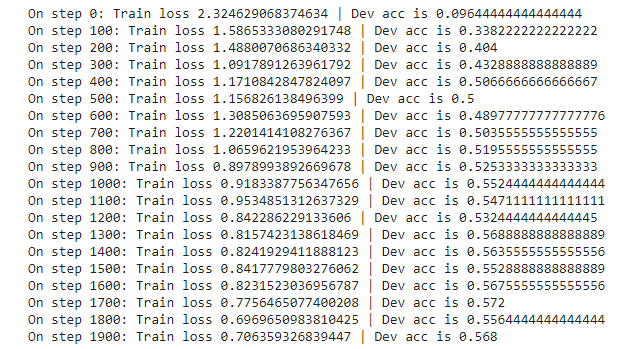

Test Accuracy Using Model:

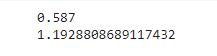

Previously, our model preformed around 91% with a smaller data set (900 images) and the test and validation splits were within this data set. After moving towards a larger data set (800 train, 225 validation, and 100 test), the method generalizes pretty early and the max accuracy of the model is around 56-57% on the validation set. This accuracy is pretty similar for the test set as well, maxing to around 58-59% 

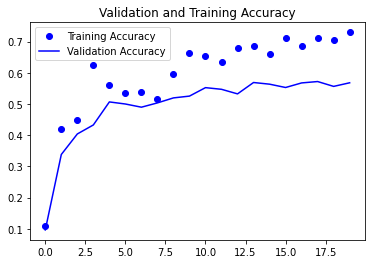

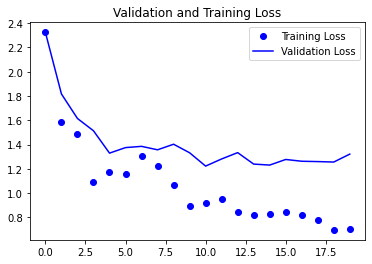

## Comparison of BestNN to Baselines

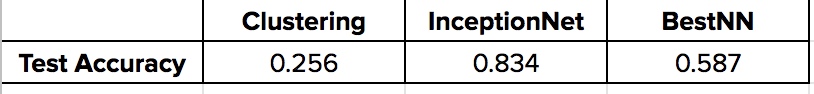

Ultimately, InceptionNet performed the best with an accuracy of around 80%. We believe InceptionNet performed the best since this used a pretrained model on ImageNet, a huge dataset with many classes. BestNN then performed the second best, and lastly the clustering algorithm. We see that the convolutional neural network approaches overall outperformed the supervised learning approach, given the comparison we made with the purity score and accuracy.

# Discussion

## What you've learned

We were able to apply what we learned in the deep learning lectures and breakouts, particularly with neural networks and convolutional neural networks and recent homework 5. 

While working on this, a problem we ran into that we had to adjust was the number and specificity of our classes, which was necessary for the clustering and HD-CNN models. This was suprising to us since we didn't realize that the clustering would perform so poorly as a result from too broad-ranging categories. It was interesting to see how when we narrowed the categories, the clustering algorithm performed better, but still was not good in terms of the purity score.

As we’ve worked on this deep learning approach to solving an object classification task, we’ve found ourselves asking how the architecture of the neural network models can be better interpreted. If we had more time, it would be interesting to implement LIME on our models, and see how the different models interpreted our dataset differently. It would be interesting to see if there is a large or subtle difference in interpretability of the images. 

If we had more time, we also would have retrained and tested our models on the exact same dataset with the same preprocessing techniques. We unfortunately realized this problem too late - the pretrained InceptionNet model required very specific normalization and input image sizes. However, we had already trained our BestNN and created our dataset with our own defined augmented and normalized, and cropped images to a different dimension. Because of this, our results may not be entirely comparable. However, we did use the same images and split size for train/ val/ test, so there is some baseline of comparability. 

Furthermore, this issue of consistency was something we realized later on. During our presentation, we presented high accuracy of 90% for our BestNN. However, this was performed on a random train/ val/ test set which was inconsistent with what we trained our InceptionNet model on. So, we retrained and ensured the splits were consistent across. However, our accuracy dropped to about 50%. We tried to figure out and understand why this was the case, but weren't able to successfully reach a conclusion, as our updated splits were completely balanced, and had greater data as compared to originally. 

We additionally would have explored more sophisticated methods for implementing our BestNN, since in the end it did not perform that well. 

Ultimately, we learned a lot from working on this project. With a lot of moving parts and aspects such as train / testing splits, and ensuring consistency across models, we've learned how important it is to keep everything organized, consistent and documented. It was also interesting to see the results of the baselines, and how certain classes of our dataset were a lot easier to classify, particularly the general categories of animals (cats, dogs, and wild) and faces, as compared to the seemingly more difficult categories of our foods.

In the end, we enjoyed exploring this object classification task, and look forward to applying what we learned here in this project to our future work. 

# References

1. Serre T, Oliva A, Poggio T. A feedforward architecture accounts for rapid categorization. Proc Natl Acad Sci U S A. 2007 Apr 10;104(15):6424-9.
doi: 10.1073/pnas.0700622104. Epub 2007 Apr 2. PMID: 17404214; PMCID: PMC1847457.

2. Z. Yan et al., "HD-CNN: Hierarchical Deep Convolutional Neural Networks for Large Scale Visual Recognition," 2015 IEEE International Conference
on Computer Vision (ICCV), Santiago, 2015, pp. 2740-2748, doi: 10.1109/ICCV.2015.314.

3. M. Fachrurrozi et al., "The grouping of facial images using agglomerative hierarchical clustering to improve the CBIR based face recognition system,"
2017 International Conference on Data and Software Engineering (ICoDSE), Palembang, 2017, pp. 1-6, doi: 10.1109/ICODSE.2017.8285868.

4. Szegedy, Christian, et al. "Rethinking the inception architecture for computer vision." Proceedings of the IEEE conference on computer vision and pattern recognition. 2016.